In [19]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Metazygia monitor 1.csv")

spider_names = ['Monitor 1 Spider 1', 'Monitor 1 Spider 2', 'Monitor 1 Spider 3', 'Monitor 1 Spider 4', 'Monitor 1 Spider 5', 'Monitor 1 Spider 6', 'Monitor 1 Spider 7', 'Monitor 1 Spider 8', 'Monitor 1 Spider 9', 'Monitor 1 Spider 10', 'Monitor 1 Spider 11', 'Monitor 1 Spider 12', 
'Monitor 1 Spider 13', 'Monitor 1 Spider 14','Monitor 1 Spider 15', 'Monitor 1 Spider 16', 'Monitor 1 Spider 17', 'Monitor 1 Spider 18', 'Monitor 1 Spider 19', 'Monitor 1 Spider 20', 'Monitor 1 Spider 21', 'Monitor 1 Spider 22', 'Monitor 1 Spider 23',
'Monitor 1 Spider 24', 'Monitor 1 Spider 25', 'Monitor 1 Spider 26', 'Monitor 1 Spider 27', 'Monitor 1 Spider 28', 'Monitor 1 Spider 29', 'Monitor 1 Spider 30', 'Monitor 1 Spider 31', 'Monitor 1 Spider 32']

In [26]:
def plot_night(dfa): 
    min_day=1440
    for j in range(1, len(dfa.index)):
        global start1
        global end1
        global start2
        global end2
        if dfa.lights[j] == 1:
            lights_on = True
        else:
            lights_on = False

        if lights_on == False and j-1==0:
            start1 = j
        if lights_on == True and dfa.lights[j-1] == 0:
            end1 = j+1
        if lights_on==False and dfa.lights[j-1] == 1:
            start2 = j
        if lights_on==False and j==( len(dfa.index)-2):
            end2= j

In [38]:
def create_ylimit(df):
    #find the standard deviation and mean from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

In [52]:
def plot_raster(num_days, df, spider, h, min_day, ax, y): 
    for i in range(0,num_days):
                #ax[i].plot(df['Date-Time'][min_day*i:min_day*(i+1)], df[spider[h]][min_day*i:min_day*(i+1)], color='blue')
                ax[i].plot(df_time['time'][min_day*i:min_day*(i+1)], df[spider[h]][min_day*i:min_day*(i+1)], color='blue')
                ax[i].set_ylabel('d'+str(i+1))
                ax[i].set_xticks([])
                #print(spider[h])
                # the y limit is the mean plus 3 standard deviations
                ax[i].set_ylim(0,y)
                #setting instructions for shading the graph when the lights are off
                dfa=df[min_day*(i):min_day*(i+1)]
                dfa=dfa.reset_index()
                if np.mean(dfa.lights)==0:
                    ax[i].axvspan(0,min_day, alpha=.5,color='grey')
                else:
                    plot_night(dfa)
                    ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
                    ax[i].axvspan(start2, end2,alpha=0.5, color='grey')

In [53]:
def spider_raster(df, spider):
    #make variables for the units of time used in the function
    min_day=1440
    total_time = len(df.index)
    num_days = total_time//min_day
    #create a copy and separate the date and time for reference
    df_time = df.copy()
    df_time[["day", "time"]] = df_time["Date-Time"].str.split("-", expand = True)
    
    #for loop for creating figures for the number of spiders in the dataframe
    for h in  range(0, len(spider)):
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
        fig.suptitle(spider[h], fontsize=16)        
        #setting the y axis limit
        y = create_ylimit(df) 
        #plotting the raster plots
        plot_raster(num_days, df, spider, h, min_day, ax, y)
        #plot x axis
        ax[num_days-1].set_xticks(range(0, min_day, 360)) 
        plt.xlabel('Time')
        #save figure
        fig.savefig(spider_names[h] +'raster.jpg')
        print('Next spider')

Next spider
Next spider
Next spider
Next spider


KeyboardInterrupt: 

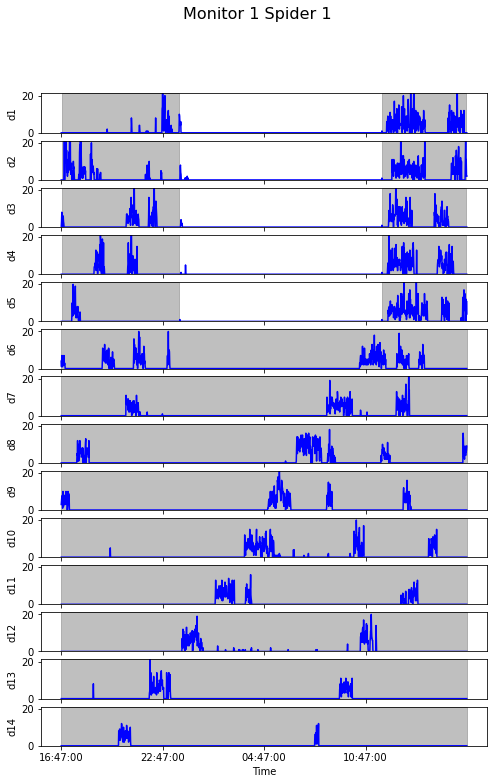

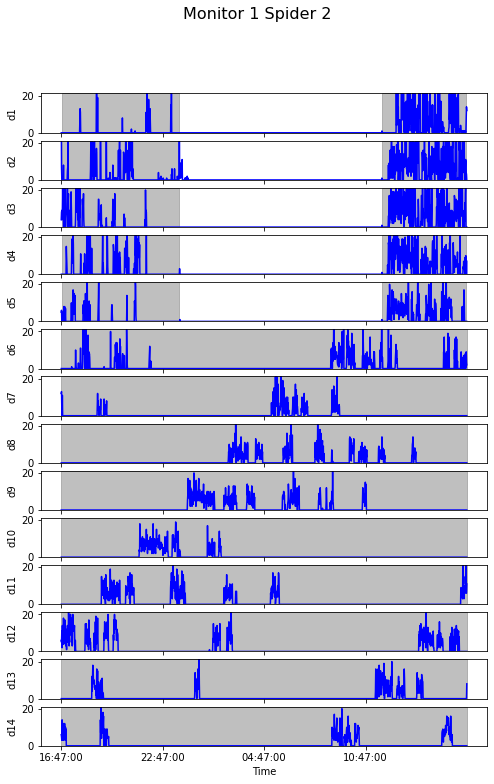

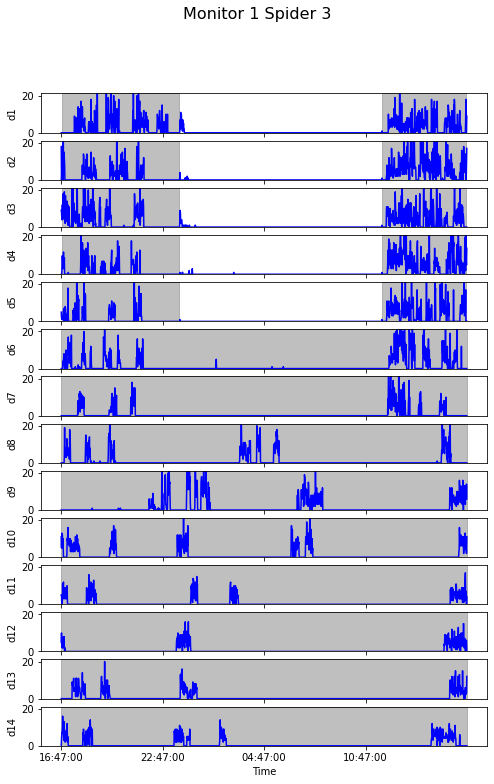

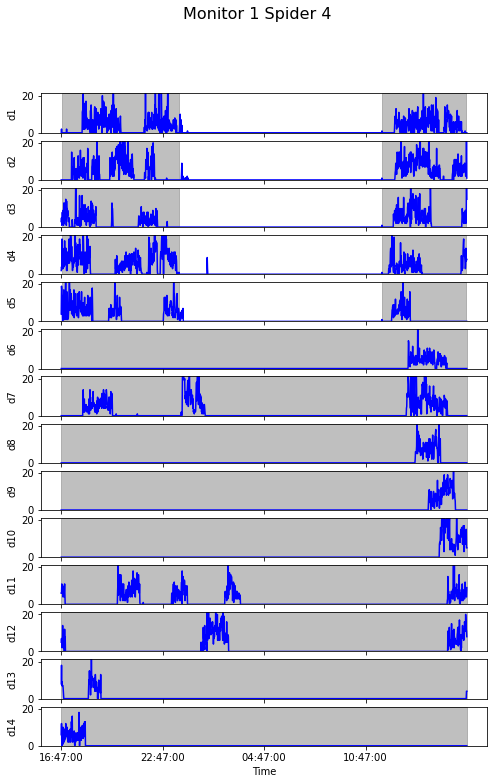

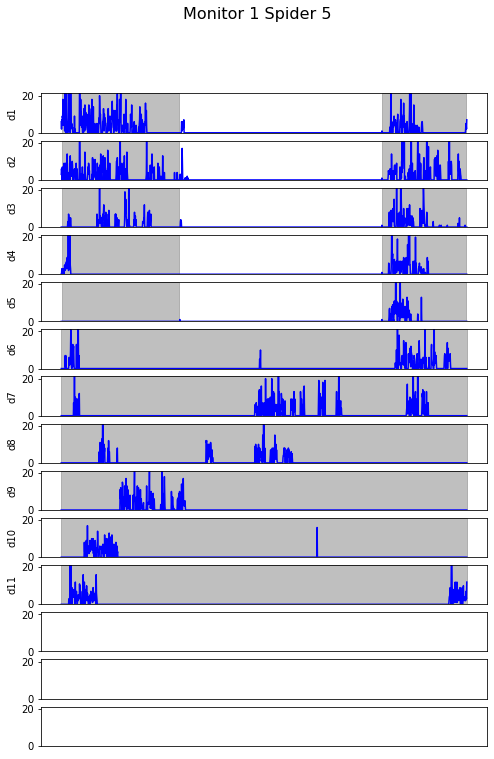

In [54]:
df_copy = df.copy()
df_copy = df_copy[436:]

spider_raster(df_copy, spider_names)

Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider


<ipython-input-10-51db71f00c6b>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)


Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider


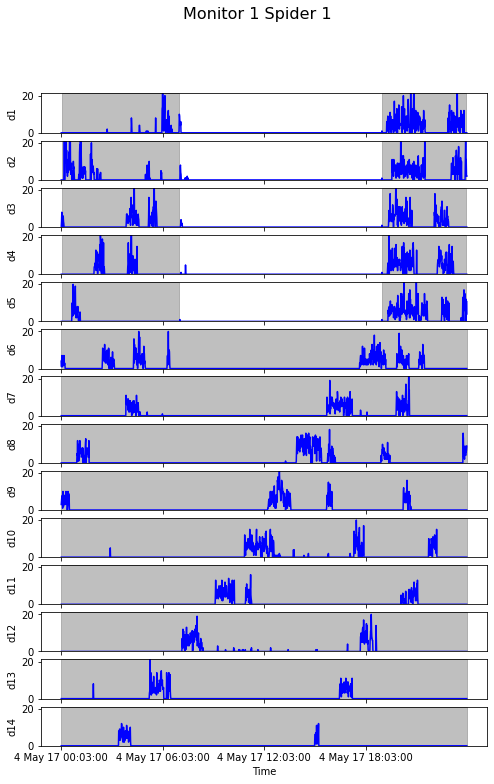

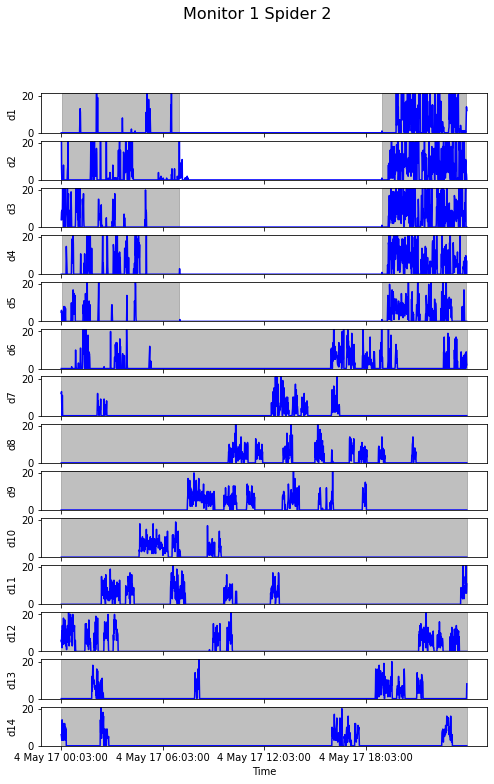

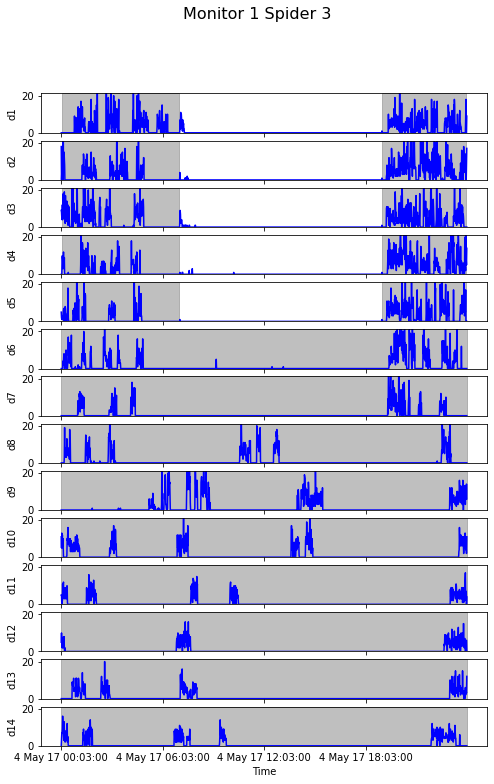

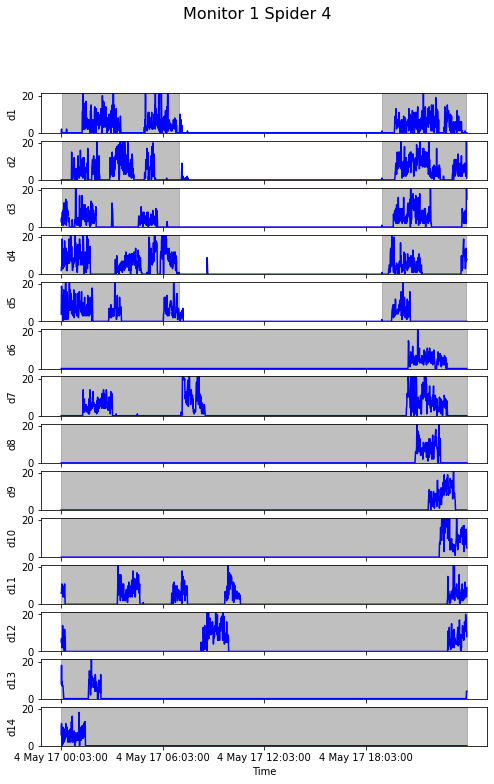

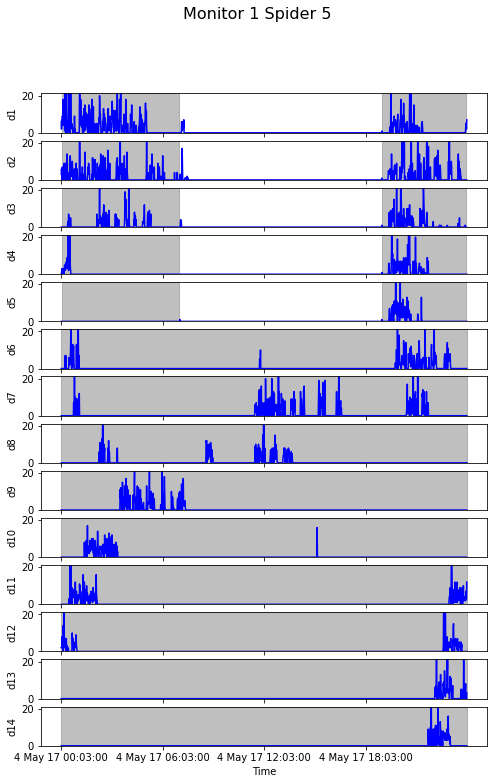

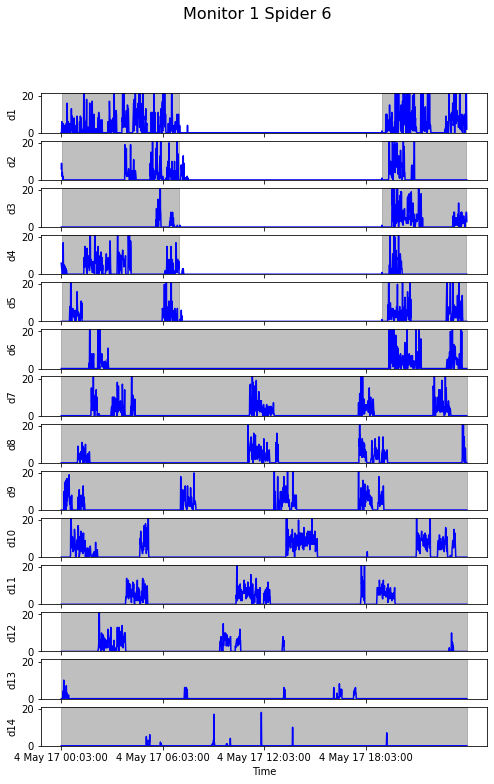

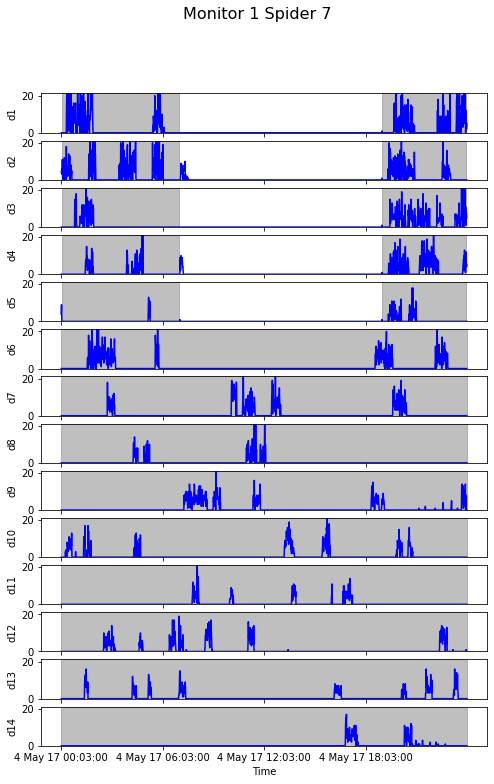

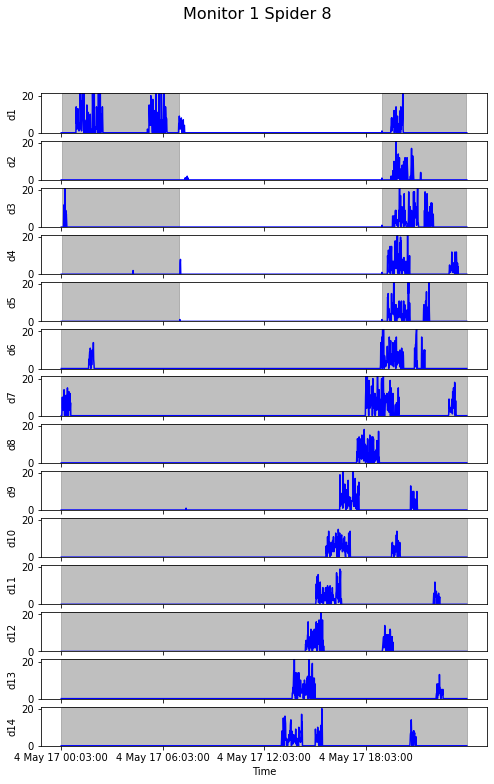

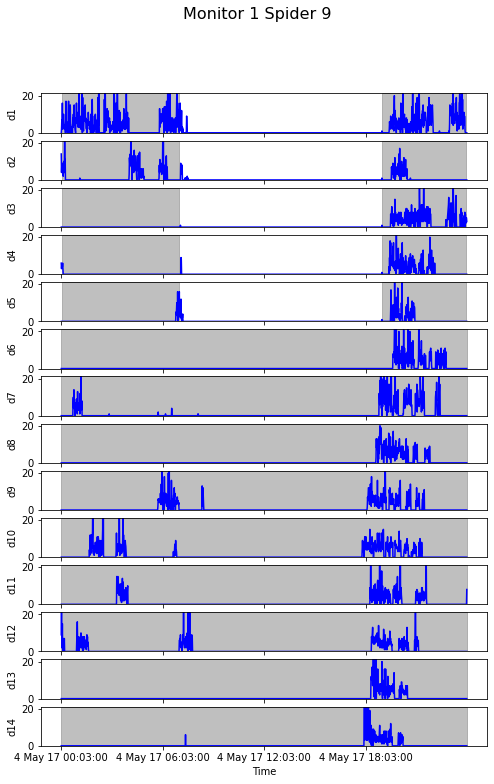

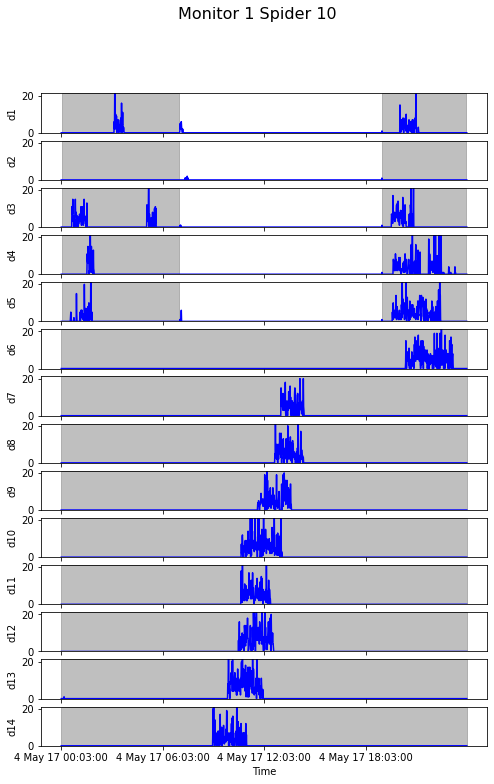

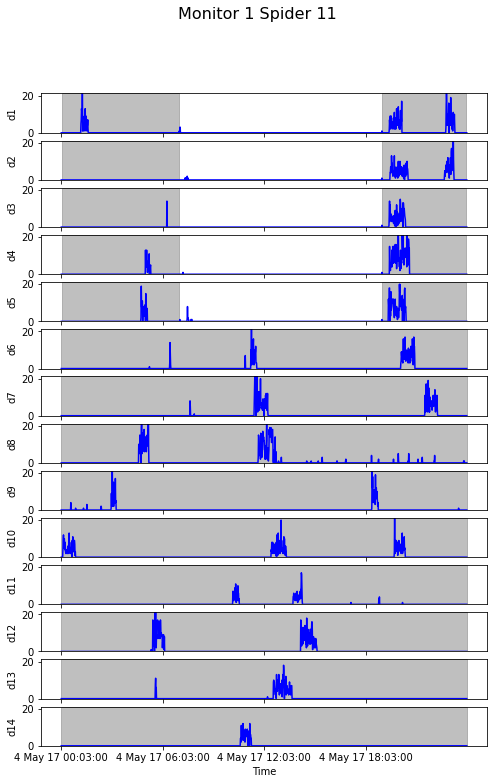

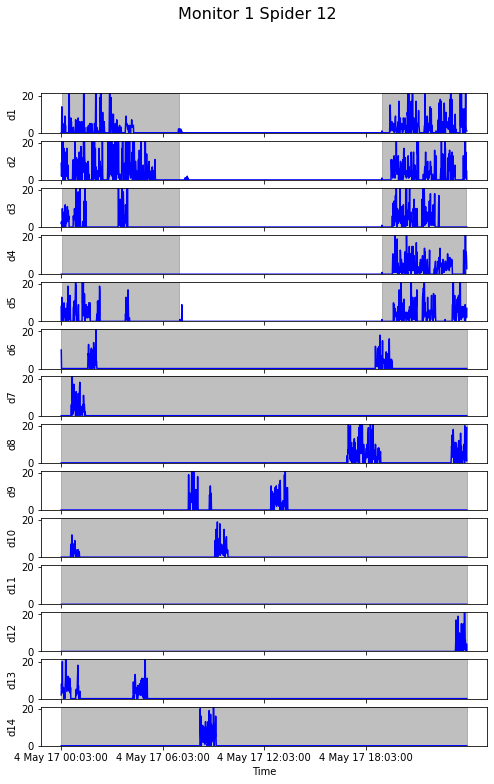

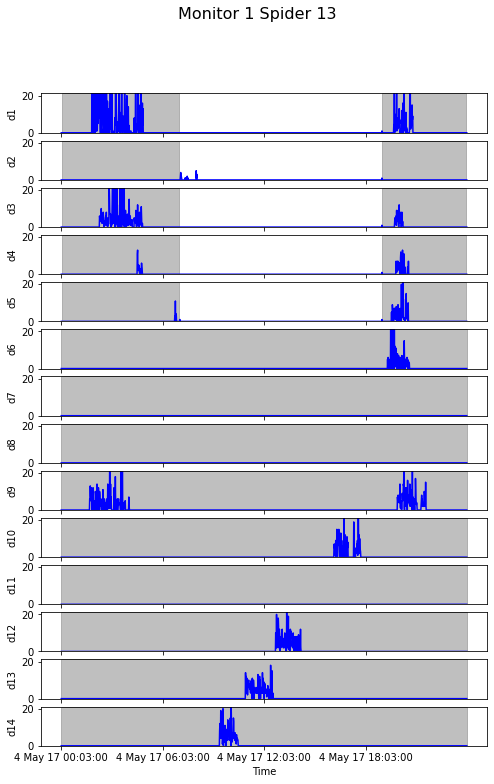

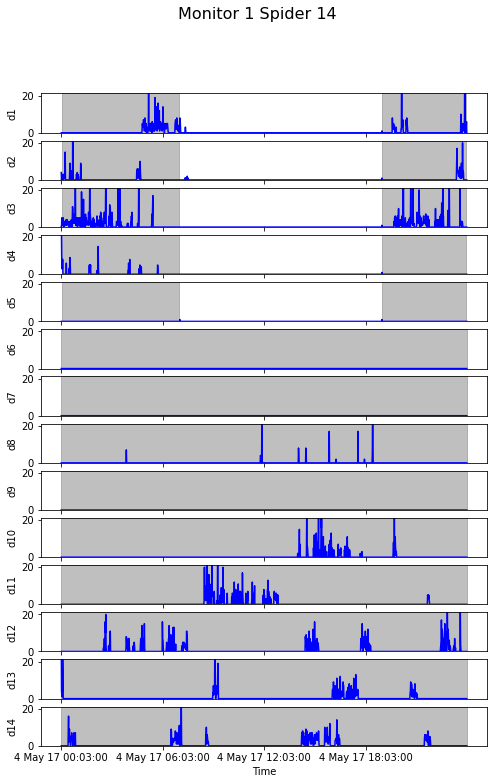

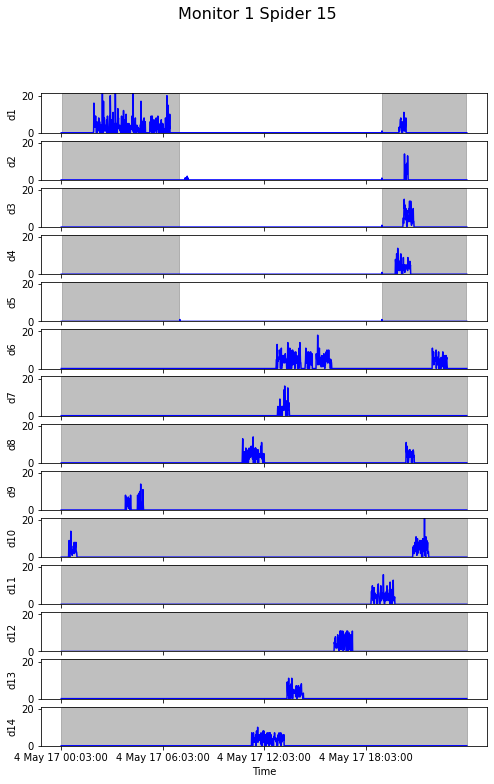

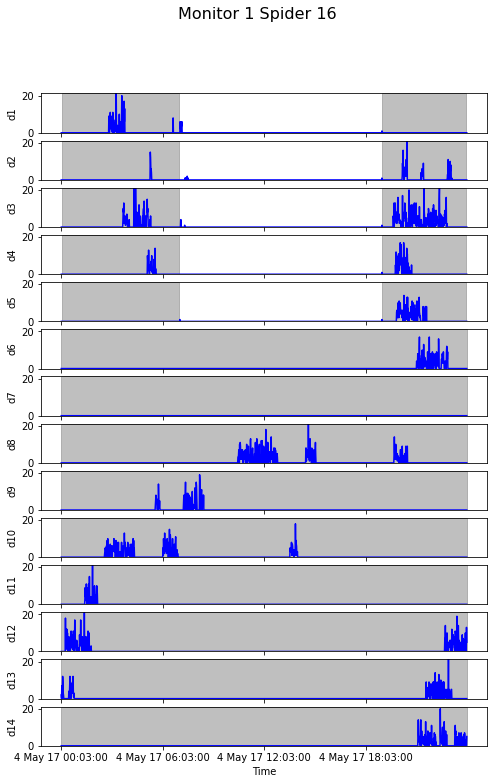

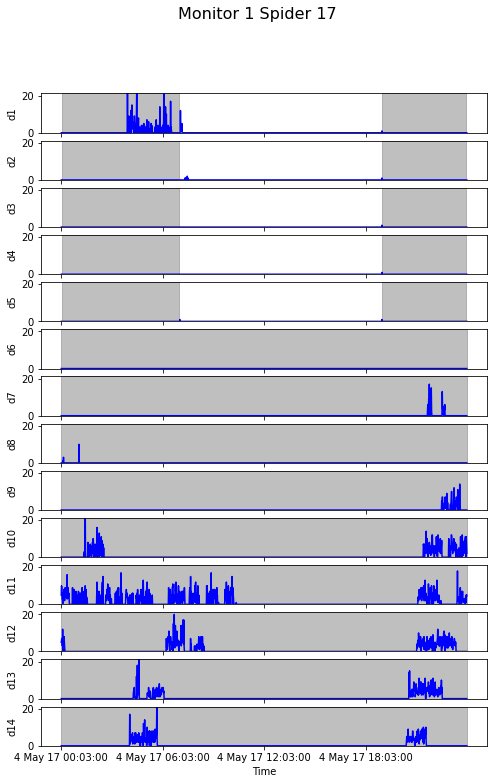

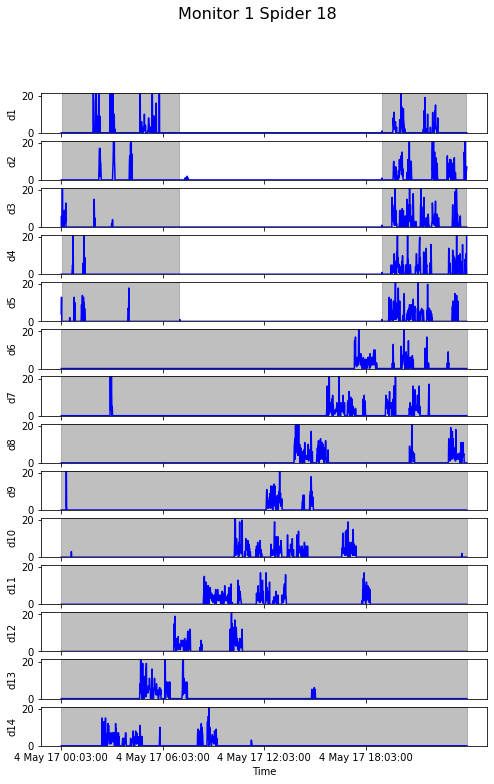

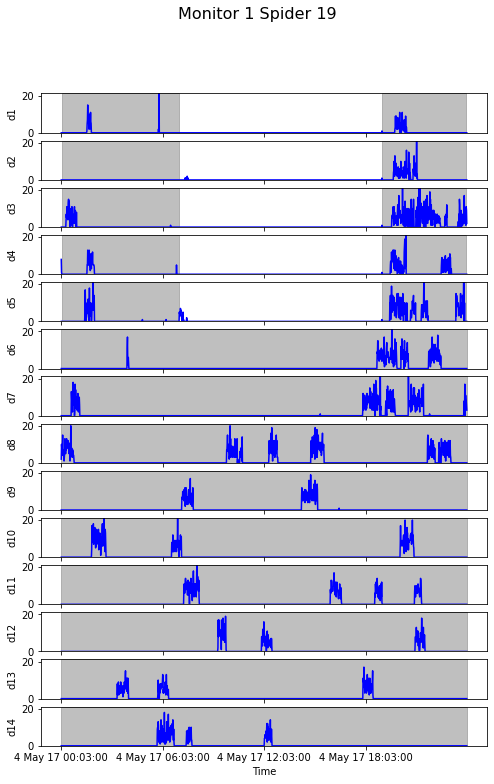

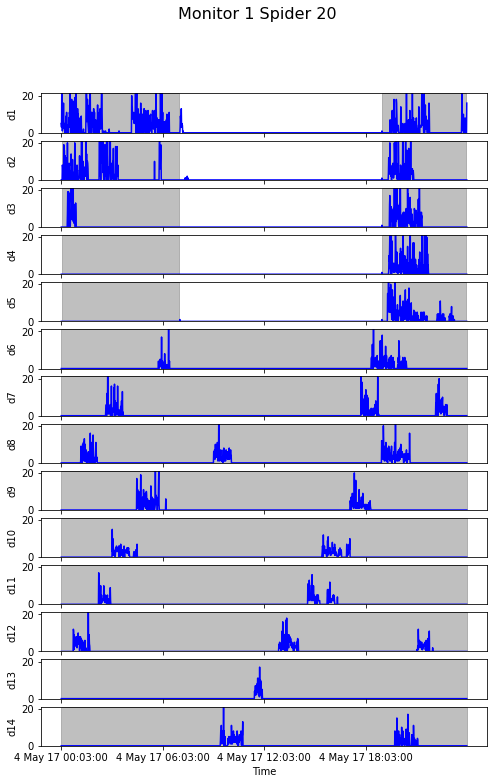

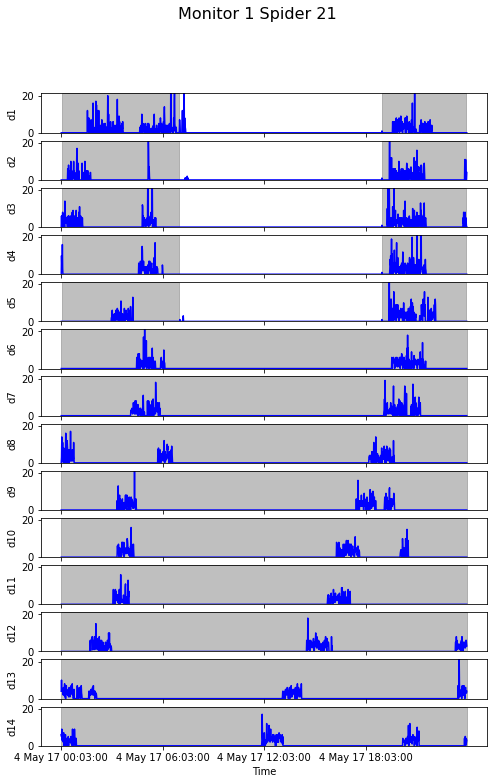

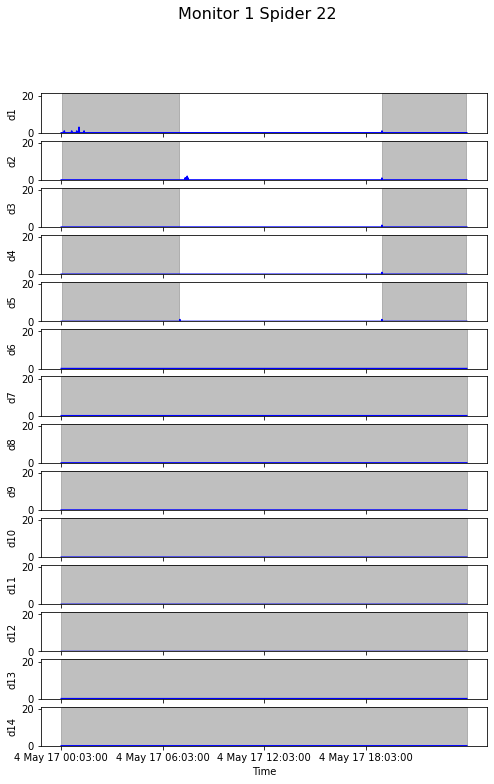

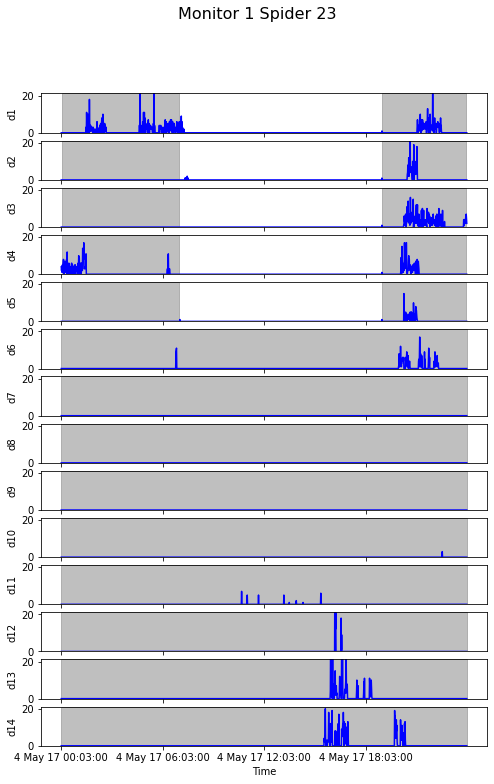

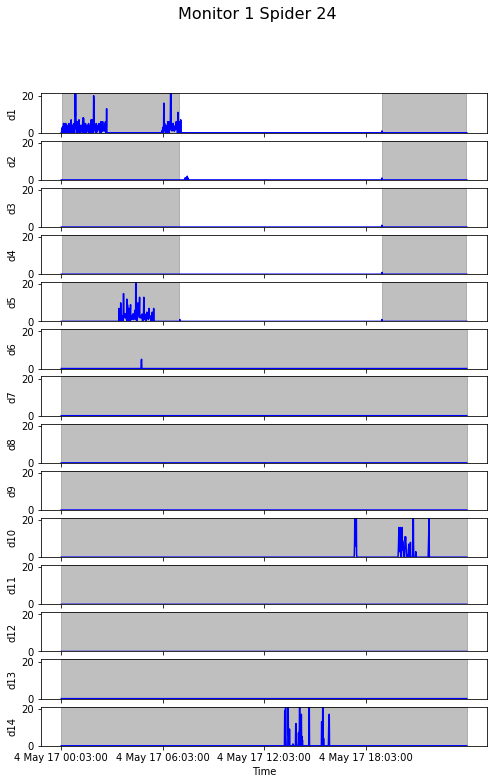

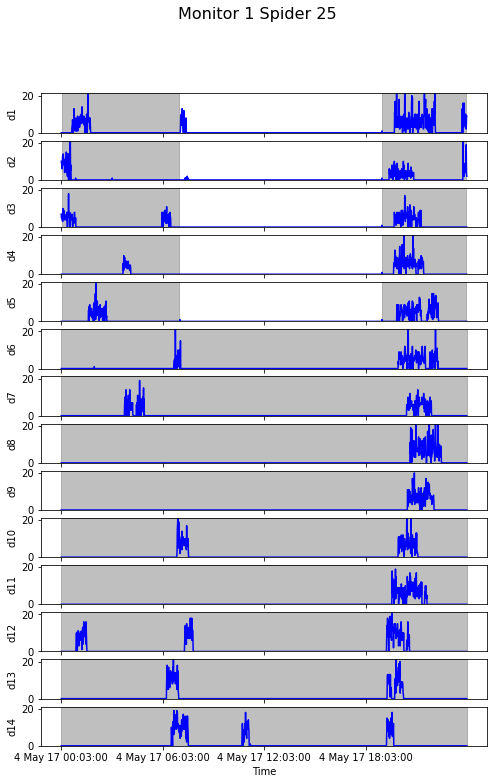

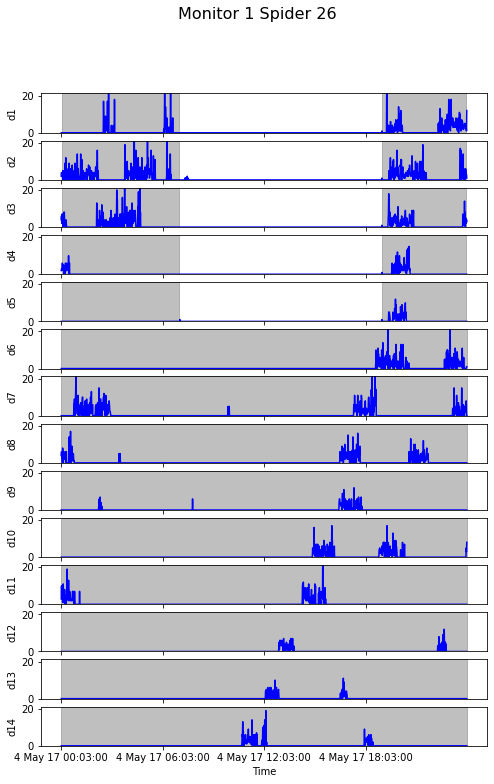

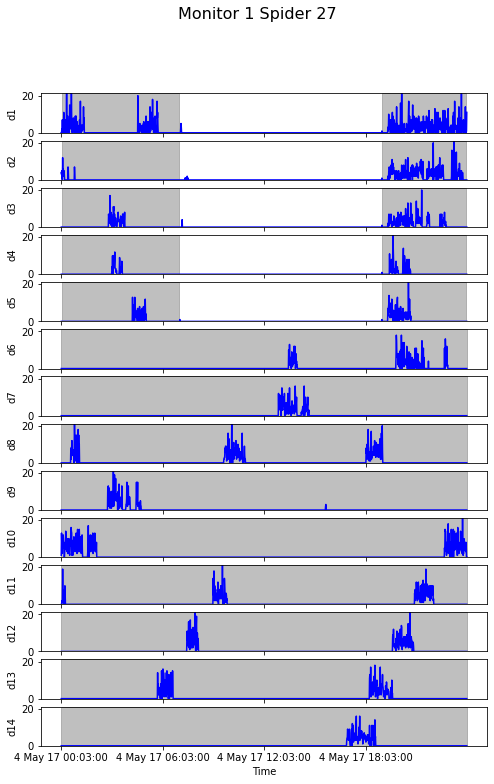

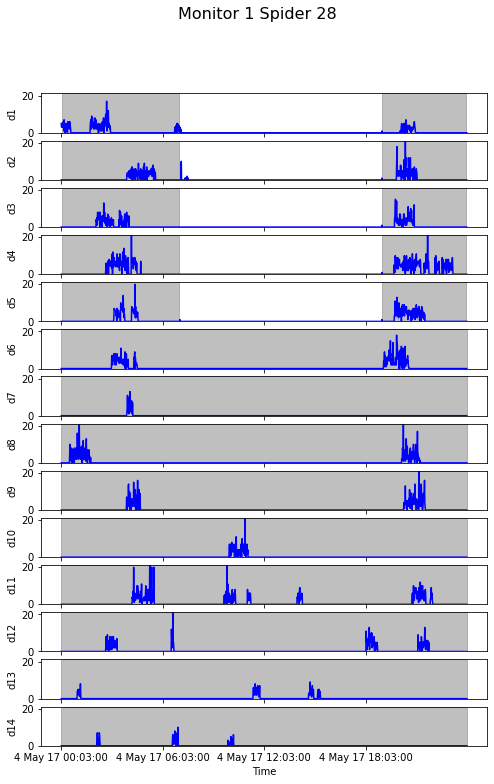

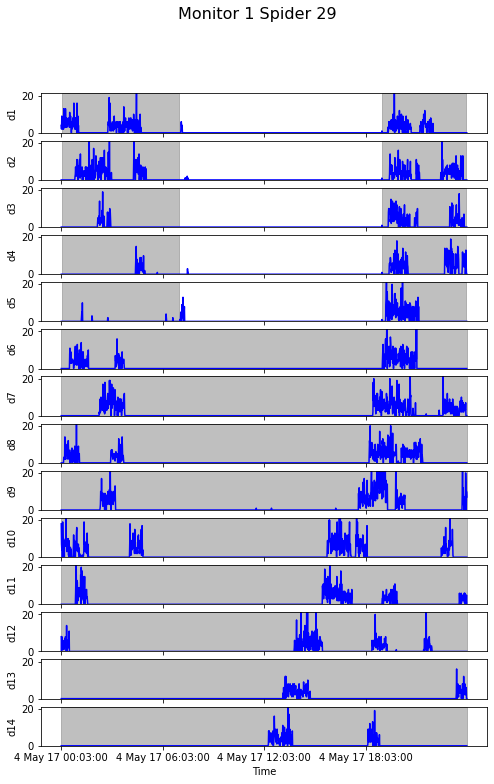

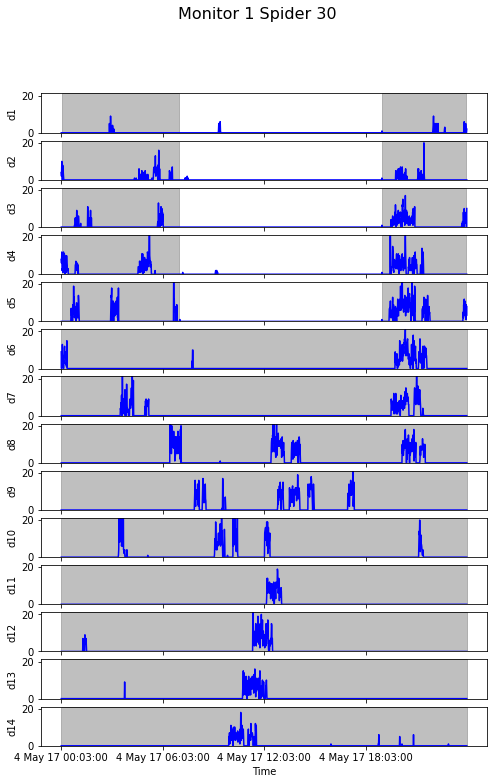

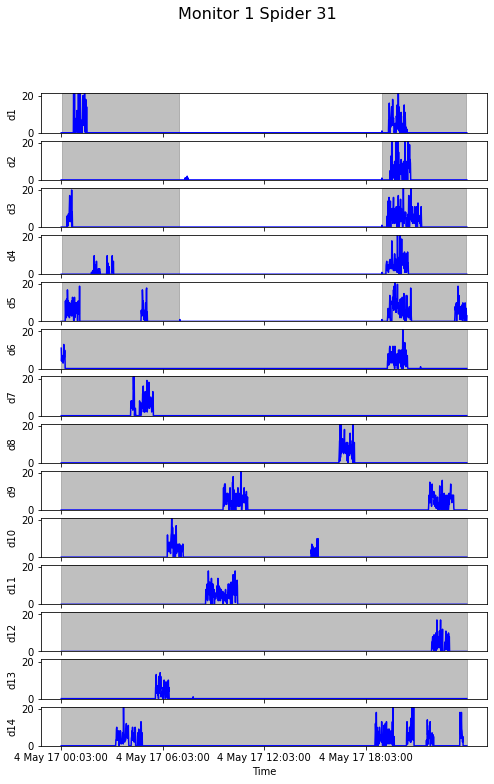

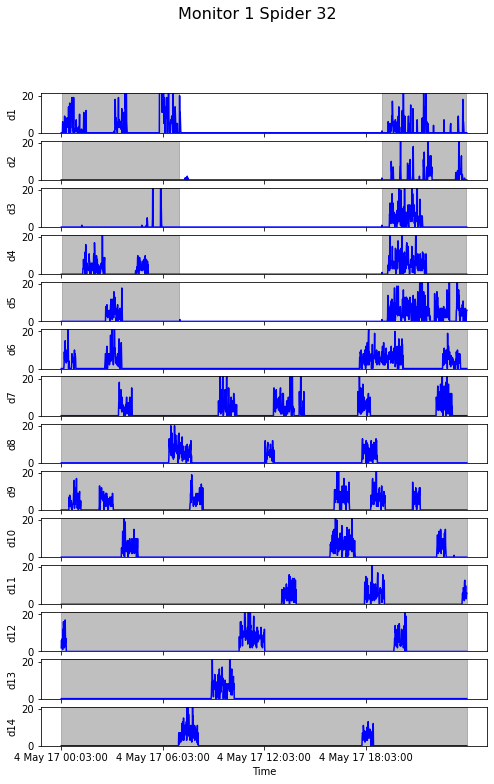

In [11]:
#fig.savefig(spider+'raster.jpg')
spider_raster(df_copy, spider_names)

In [36]:
#spider_raster(df, spider_names[1])
print(len(spider_names[1]))
print(len(spider_names[0]))
print(len(spider_names))
print(spider_names[0])

18
18
32
Monitor 1 Spider 1


Next spider


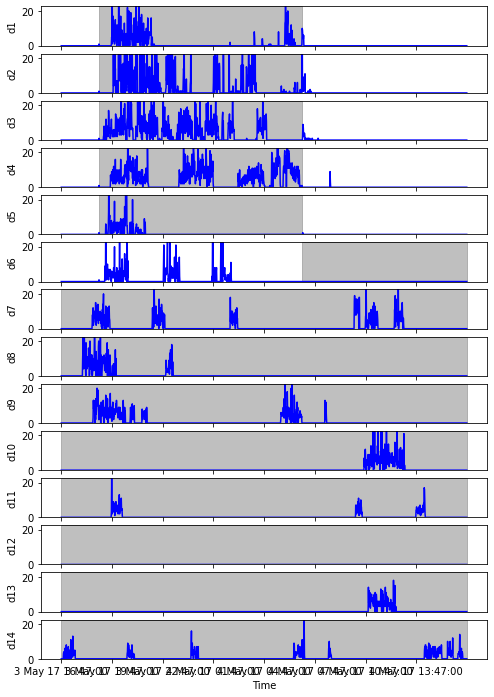

In [43]:
spider_raster(df, spider_names)

KeyError: 'M'

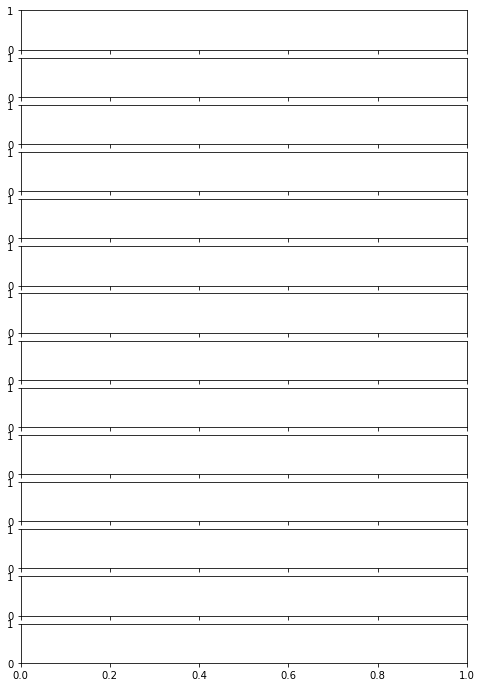

In [44]:
spider_raster(df, spider_names[0])